In [58]:
pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

In [2]:
nltk.data.path.append('/Users/dureaqdaskhan/nltk_data')

In [3]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dureaqdaskhan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dureaqdaskhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dureaqdaskhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dureaqdaskhan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:

# Load the dataset
df = pd.read_csv("dataset.csv")

df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [6]:
df.shape

(200000, 2)

In [7]:
df

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


In [8]:
df['humor'].value_counts()

humor
False    100000
True     100000
Name: count, dtype: int64

In [9]:
# shape of data
print("Shape of Data:",df.shape)

Shape of Data: (200000, 2)


In [10]:
df.isna().sum()

text     0
humor    0
dtype: int64

In [10]:
df['text'].value_counts()

text
Joe biden rules out 2020 bid: 'guys, i'm not running'                                                1
Huffpost hill - 'was it over when the germans bombed pearl harbor?' freedom caucus asks              1
A five minute fashion fix: how to cure the frumps                                                    1
8 things that are way dirtier than you realize (and what to do about it)                             1
What do you call someone with no body and no nose? nobody nose                                       1
                                                                                                    ..
My email password has been hacked. that's the third time i've had to rename the cat.                 1
Donald trump wants to break up big banks                                                             1
Why did the witch go to the psychiatrist? because she thought everybody loved her.                   1
What's the difference between a black man and batman? batman can wal

### Word Cloud for Analysis

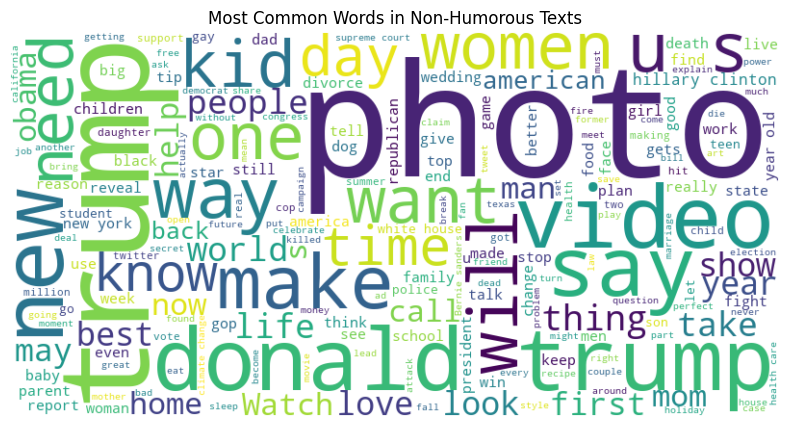

In [11]:
# Separate humorous and non-humorous texts
non_humorous_text = ' '.join(df[df['humor'] == 0]['text'])
humorous_text = ' '.join(df[df['humor'] == 1]['text'])

# Non-Humorous word cloud
wordcloud_non_humorous = WordCloud(width=800, height=400, background_color='white').generate(non_humorous_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_humorous, interpolation='bilinear')
plt.title('Most Common Words in Non-Humorous Texts')
plt.axis('off')
plt.show()



The word cloud above visualizes the most frequently occurring words in non-humorous texts from the dataset. 

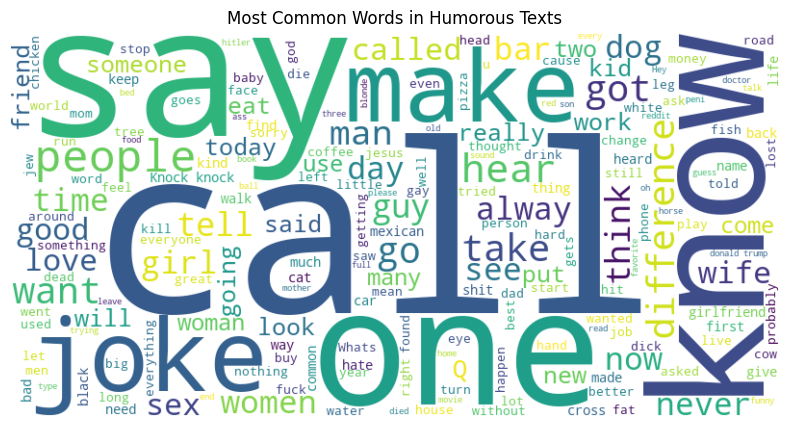

In [12]:
# Humorous word cloud
wordcloud_humorous = WordCloud(width=800, height=400, background_color='white').generate(humorous_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_humorous, interpolation='bilinear')
plt.title('Most Common Words in Humorous Texts')
plt.axis('off')
plt.show()


### Data preprocessing

In [13]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [14]:
# Function for preprocessing: Clean text, remove stopwords, and lemmatize
def preprocess_text(text):
    # Remove special characters and numbers, convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    return " ".join(tokens)


In [15]:
# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Show the first few rows after preprocessing
df[['text', 'processed_text']].head()

,text,processed_text
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",joe biden rule bid guy im running
1,Watch: darvish gave hitter whiplash with slow ...,watch darvish gave hitter whiplash slow pitch
2,What do you call a turtle without its shell? d...,call turtle without shell dead
3,5 reasons the 2016 election feels so personal,reason election feel personal
4,"Pasco police shot mexican migrant from behind,...",pasco police shot mexican migrant behind new a...


## TF-IDF Analysis for Humorous vs Non-Humorous Texts


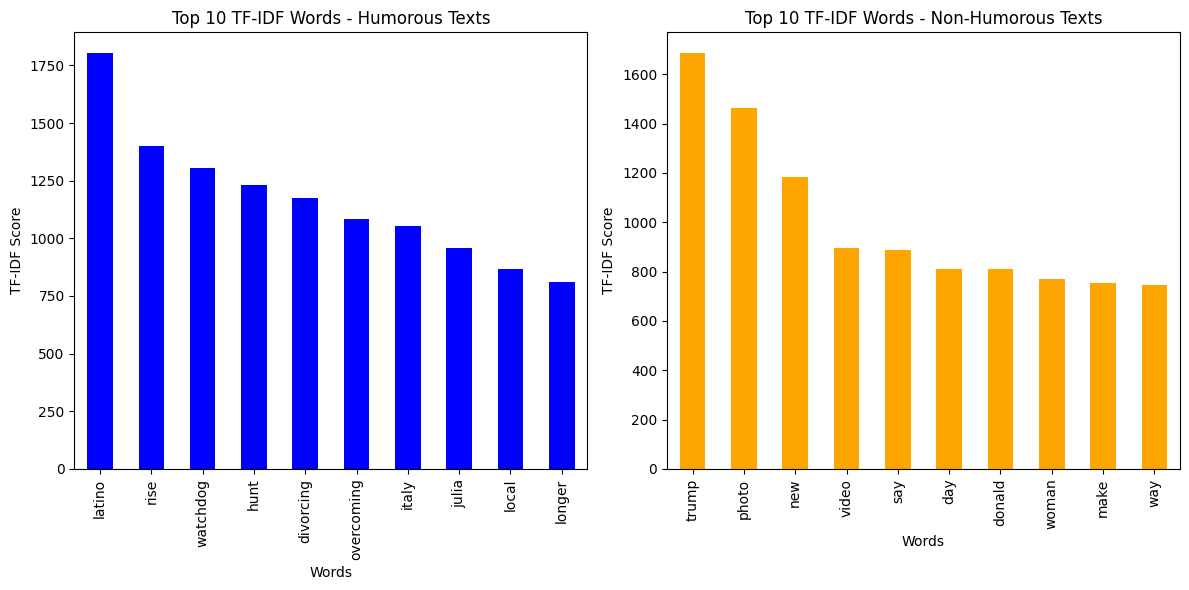

In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
# Fit and transform for humorous and non-humorous texts
humorous_tfidf = vectorizer.fit_transform(df[df['humor'] == 1]['processed_text'])
non_humorous_tfidf = vectorizer.fit_transform(df[df['humor'] == 0]['processed_text'])

# Convert the results into DataFrames for easy visualization
humorous_tfidf_df = pd.DataFrame(humorous_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
non_humorous_tfidf_df = pd.DataFrame(non_humorous_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Compute the sum of TF-IDF scores for each word
humorous_tfidf_scores = humorous_tfidf_df.sum().sort_values(ascending=False)
non_humorous_tfidf_scores = non_humorous_tfidf_df.sum().sort_values(ascending=False)

# Plotting the top TF-IDF words for humorous and non-humorous texts
plt.figure(figsize=(12, 6))

# Plot for humorous texts
plt.subplot(1, 2, 1)
humorous_tfidf_scores.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 TF-IDF Words - Humorous Texts')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')

# Plot for non-humorous texts
plt.subplot(1, 2, 2)
non_humorous_tfidf_scores.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 TF-IDF Words - Non-Humorous Texts')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')

plt.tight_layout()
plt.show()

In [17]:
df

,text,humor,processed_text
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rule bid guy im running
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash slow pitch
2,What do you call a turtle without its shell? d...,True,call turtle without shell dead
3,5 reasons the 2016 election feels so personal,False,reason election feel personal
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant behind new a...
...,...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False,conor maynard seamlessly fit oldschool rb hit ...
199996,How to you make holy water? you boil the hell ...,True,make holy water boil hell
199997,How many optometrists does it take to screw in...,True,many optometrist take screw lightbulb one two ...
199998,Mcdonald's will officially kick off all-day br...,False,mcdonalds officially kick allday breakfast oct...


We can see that humorous texts contain terms like "diabetes," "lawmaker," and "jeans," while non-humorous texts feature words such as "trump," "photos," and "video." These visualizations provide insights into the distinct vocabulary used in humorous vs non-humorous content.

## Joke Lengths Analysis

/var/folders/38/qw_rrlt93hj2cg5m59k8_4yw0000gq/T/ipykernel_9646/3202973515.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_joke_length.index, y=mean_joke_length.values, palette='viridis')


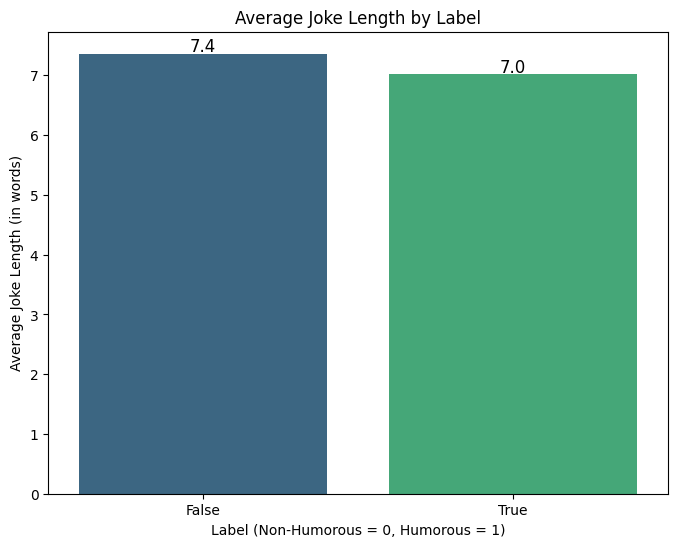

In [18]:
# Calculate the word count for each joke
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Calculate the average joke length (mean sentence length) for each label (humorous vs non-humorous)
mean_joke_length = df.groupby('humor')['word_count'].mean()

# Bar plot for average joke length
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=mean_joke_length.index, y=mean_joke_length.values, palette='viridis')

# Annotate bars with the actual mean values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Round to 1 decimal place
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Average Joke Length by Label')
plt.xlabel('Label (Non-Humorous = 0, Humorous = 1)')
plt.ylabel('Average Joke Length (in words)')
plt.show()


This indicates that, on average, humorous jokes tend to be slightly longer than non-humorous ones

## check class distribution

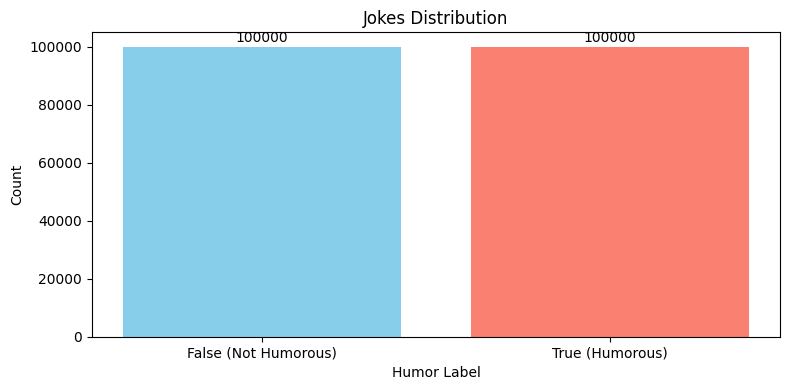

In [19]:
val_count = df.humor.value_counts()

plt.figure(figsize=(8, 4))
bars = plt.bar(val_count.index, val_count.values, color=['skyblue', 'salmon'])
plt.title("Jokes Distribution")
plt.xlabel("Humor Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['False (Not Humorous)', 'True (Humorous)'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 500, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Both categories have a relatively balanced distribution, with each class having over 100,000 examples. 

### Train Test Split

In [20]:
# Encode 'humor' column into 1 for humorous and 0 for non-humorous
df['label'] = df['humor'].map({True: 1, False: 0})

# Split the dataset into train and test sets
X = df['processed_text']  # Input features
y = df['label']  # Target labels (humorous or non-humorous)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
df

,text,humor,processed_text,word_count,label
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rule bid guy im running,7,0
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash slow pitch,7,0
2,What do you call a turtle without its shell? d...,True,call turtle without shell dead,5,1
3,5 reasons the 2016 election feels so personal,False,reason election feel personal,4,0
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant behind new a...,9,0
...,...,...,...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False,conor maynard seamlessly fit oldschool rb hit ...,9,0
199996,How to you make holy water? you boil the hell ...,True,make holy water boil hell,5,1
199997,How many optometrists does it take to screw in...,True,many optometrist take screw lightbulb one two ...,9,1
199998,Mcdonald's will officially kick off all-day br...,False,mcdonalds officially kick allday breakfast oct...,6,0


In [22]:
len(X_train)

160000

In [23]:
len(X_test)

40000

## Helper Function

this function will be used to evaluate different models for this project

In [24]:
def evaluate_model(true_value, pred_value):
    # Evaluate
    accuracy_lr = accuracy_score(true_value, pred_value)
    classif_report_lr = classification_report(true_value, pred_value)
    conf_matrix_lr = confusion_matrix(true_value, pred_value)
    
    print(f"Accuracy: {accuracy_lr}")
    print("\nClassification Report:")
    print(classif_report_lr)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Humorous', 'Humorous'], yticklabels=['Non-Humorous', 'Humorous'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
def perform_cross_validation(model, X_train_tfidf, y_train):
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print("Cross-Validation Accuracy:", scores)
    print("Mean CV Accuracy:", scores.mean())
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 6), scores, marker='o', linestyle='-', color='b', label='Accuracy per fold')
    
    plt.title('Cross-Validation Accuracy per Fold', fontsize=14)
    plt.xlabel('Fold Number', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xticks(range(1, 6))
    plt.show()

### Vectorization

### preprocess data

In [26]:
# Fit and transform for training data, then transform the test data
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [27]:
X_train_tfidf

<160000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 834570 stored elements in Compressed Sparse Row format>

In [28]:
# Print the shape of the TF-IDF matrices
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")

# Check the size of the training and test sets
print(f"Training set size: {X_train_tfidf.shape[0]}")
print(f"Test set size: {X_test_tfidf.shape[0]}")

TF-IDF Train Shape: (160000, 5000)
TF-IDF Test Shape: (40000, 5000)
Training set size: 160000
Test set size: 40000


# Logistic Regression

In [54]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_tfidf)

Accuracy: 0.878725

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20001
           1       0.88      0.88      0.88     19999

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



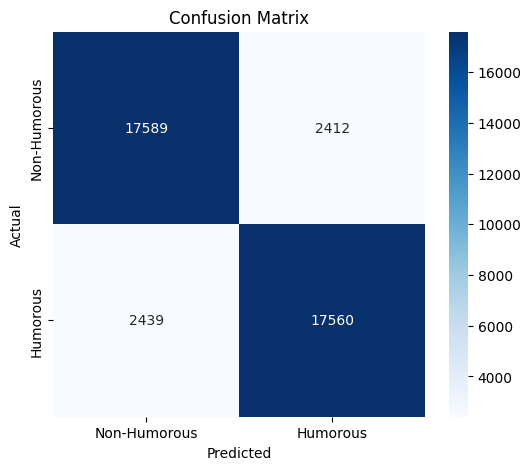

In [55]:
evaluate_model(y_test,y_pred_lr)

### 5 cross fold validation

Cross-Validation Accuracy: [0.8761875  0.8813125  0.87659375 0.8773125  0.87903125]
Mean CV Accuracy: 0.8780875


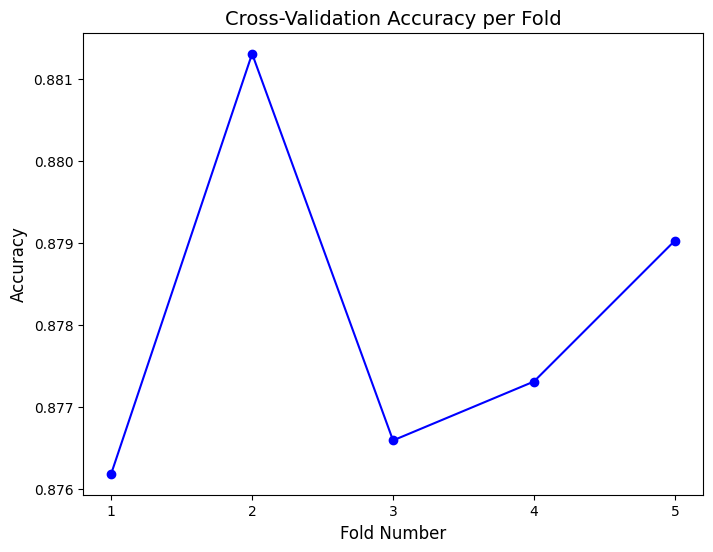

In [65]:
perform_cross_validation(lr_model, X_train_tfidf, y_train)


In [58]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_lr)

# Create a dataframe
metrics_df_lr = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
}, index=['Non-Humorous (0)', 'Humorous (1)'])
metrics_df_lr

,Precision,Recall,F1-Score,Support
Non-Humorous (0),0.878220,0.879406,0.878813,20001
Humorous (1),0.879231,0.878044,0.878637,19999


In [59]:
# Let's generate Precision-Recall curve, ROC curve, and Bar chart for Logistic Regression model evaluation
def plot_evaluation_curves(true_value, pred_value):
    # Predict probabilities for Logistic Regression
    y_probs_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]
    
    # Precision-Recall values
    precision_vals_lr, recall_vals_lr, _ = precision_recall_curve(true_value, y_probs_lr)
    
    plt.figure(figsize=(7, 5))
    plt.plot(recall_vals_lr, precision_vals_lr, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Logistic Regression)')
    plt.grid()
    plt.show()
    
    # ROC Curve
    fpr_lr, tpr_lr, _ = roc_curve(true_value, y_probs_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    plt.figure(figsize=(7, 5))
    plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
    # Bar chart for Precision, Recall, F1 for each class from Logistic Regression
    from sklearn.metrics import precision_recall_fscore_support
    
    # Get precision, recall, f1
    precision_lr, recall_lr, f1_lr, support_lr = precision_recall_fscore_support(true_value, pred_value)
    
    # Create a dataframe for plotting
    metrics_df_lr = pd.DataFrame({
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1-Score': f1_lr,
        'Support': support_lr
    }, index=['Non-Humorous (0)', 'Humorous (1)'])
    
    # Plot bar chart
    metrics_df_lr[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(8, 6))
    plt.title('Precision, Recall, and F1-Score for Each Class (Logistic Regression)')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.legend(loc='lower right')
    plt.show()



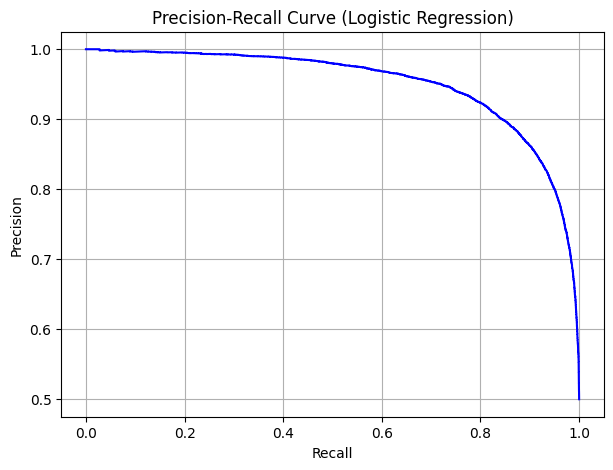

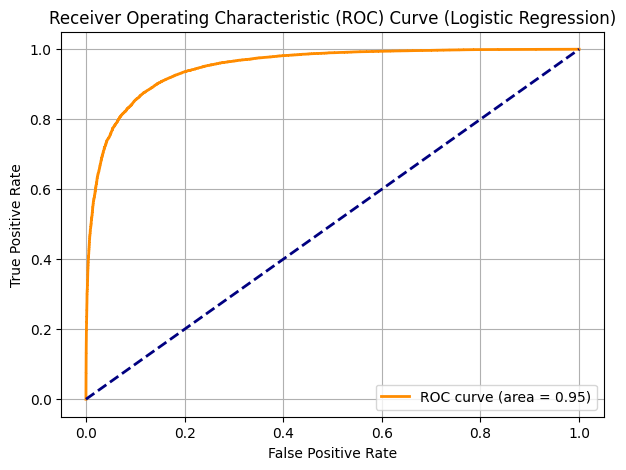

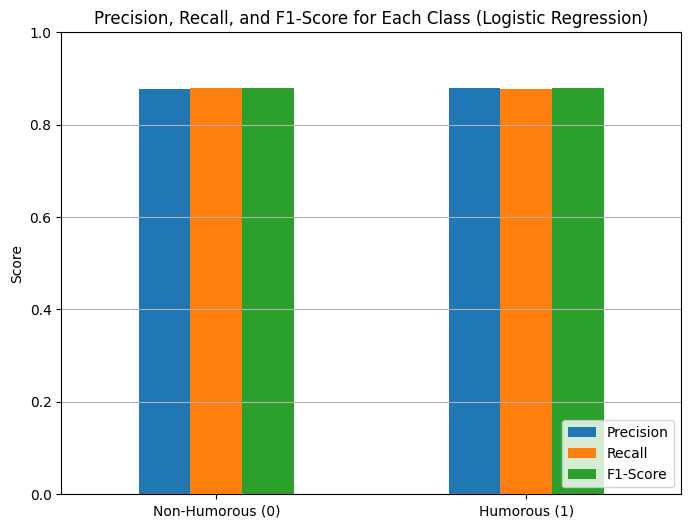

In [60]:
plot_evaluation_curves(y_test,y_pred_lr)

### Hyper parameter Tuning

In [34]:
# TF-IDF vectorizer with bigrams and more features
tfidf = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2))
X_train_tfidf_tuned = tfidf.fit_transform(X_train)
X_test_tfidf_tuned = tfidf.transform(X_test)

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 300, 500, 1000],
    'solver': ['liblinear', 'lbfgs']
}

# GridSearchCV setup
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_tfidf_tuned, y_train)

# Evaluate the best model
best_params = grid_search_lr.best_params_ 
best_lr_model = grid_search_lr.best_estimator_
y_pred_best = best_lr_model.predict(X_test_tfidf_tuned)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_report = classification_report(y_test, y_pred_best, output_dict=True)

best_params, best_accuracy, best_report

({'C': 10, 'max_iter': 100, 'solver': 'liblinear'},
 0.8934,
 {'0': {'precision': 0.8944703464180077,
   'recall': 0.8920553972301385,
   'f1-score': 0.893261239611495,
   'support': 20001.0},
  '1': {'precision': 0.8923353114247244,
   'recall': 0.8947447372368619,
   'f1-score': 0.8935384000798962,
   'support': 19999.0},
  'accuracy': 0.8934,
  'macro avg': {'precision': 0.893402828921366,
   'recall': 0.8934000672335002,
   'f1-score': 0.8933998198456956,
   'support': 40000.0},
  'weighted avg': {'precision': 0.893402882297241,
   'recall': 0.8934,
   'f1-score': 0.8933998129166839,
   'support': 40000.0}})

In [35]:
# Best parameters and model
best_params = grid_search_lr.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}


In [36]:
# Train model with best parameters
best_lr = LogisticRegression(C=best_params['C'], max_iter=best_params['max_iter'])
best_lr.fit(X_train_tfidf_tuned, y_train)

# Evaluate
y_pred = best_lr.predict(X_test_tfidf_tuned)

Accuracy: 0.8933

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     20001
           1       0.89      0.89      0.89     19999

    accuracy                           0.89     40000
   macro avg       0.89      0.89      0.89     40000
weighted avg       0.89      0.89      0.89     40000



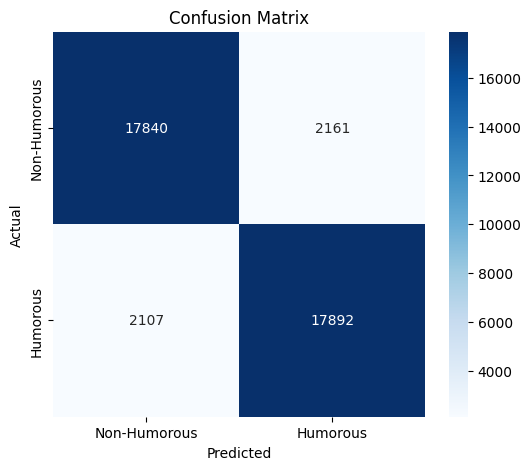

In [37]:
evaluate_model(y_test, y_pred)

# SVM

In [67]:
# 1. Initialize LinearSVC
linear_svc_model = LinearSVC(random_state=42, max_iter=5000)

linear_svc_model

LinearSVC(max_iter=5000, random_state=42)

In [68]:
# 2. Train model
linear_svc_model.fit(X_train_tfidf, y_train)

# 3. Predict on test set
y_pred_linear_svc = linear_svc_model.predict(X_test_tfidf)

Accuracy: 0.878675

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     20001
           1       0.88      0.88      0.88     19999

    accuracy                           0.88     40000
   macro avg       0.88      0.88      0.88     40000
weighted avg       0.88      0.88      0.88     40000



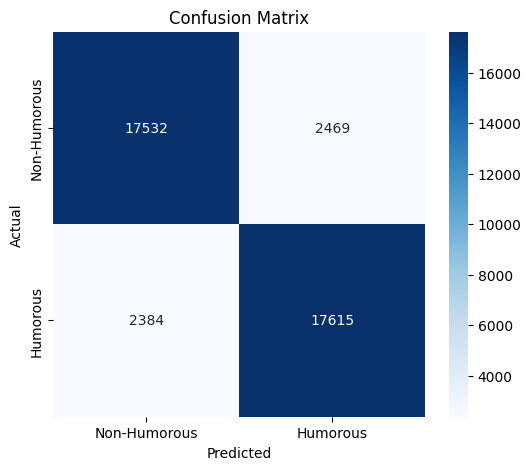

In [69]:
evaluate_model(y_test, y_pred_linear_svc)

### 5 cross fold validation for svm

Cross-Validation Accuracy: [0.87728125 0.8825     0.877625   0.8773125  0.88      ]
Mean CV Accuracy: 0.87894375


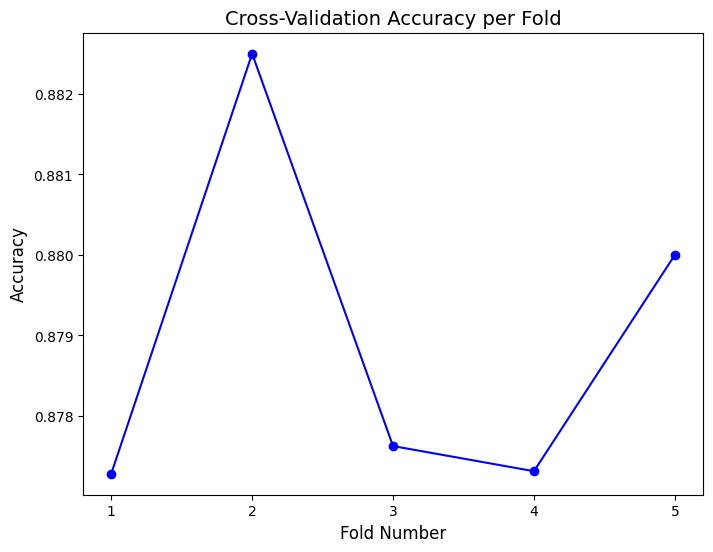

In [72]:
perform_cross_validation(linear_svc_model, X_train_tfidf, y_train)

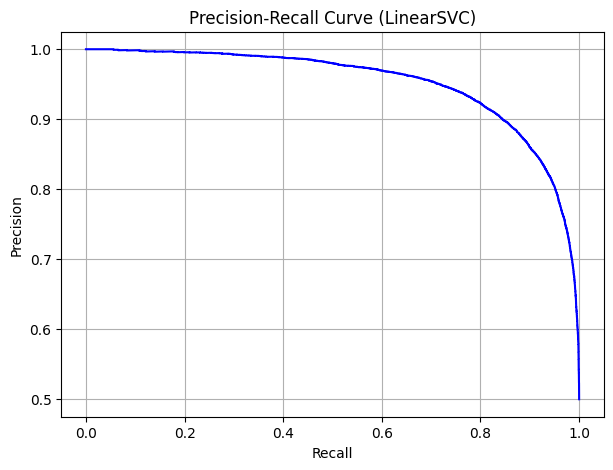

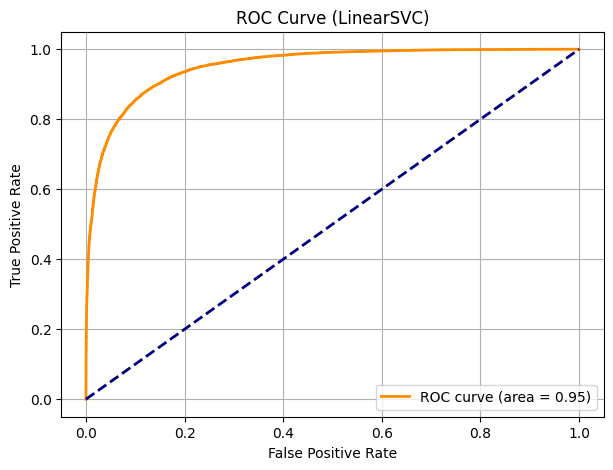

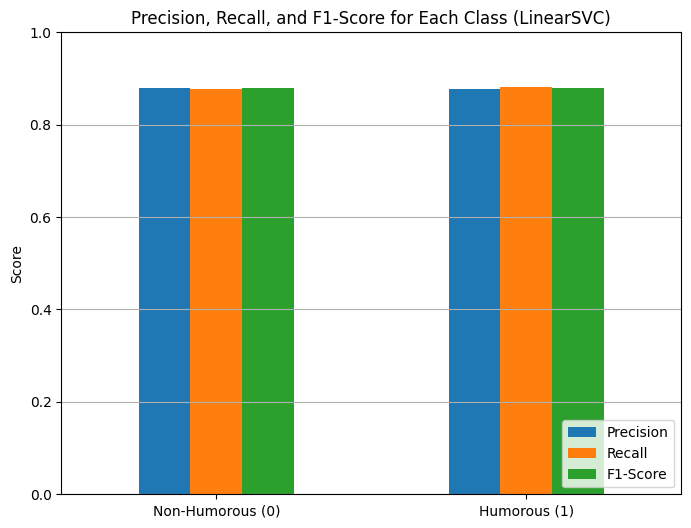

In [42]:
# Predict probabilities are not available in LinearSVC, but decision function is.
y_scores = linear_svc_model.decision_function(X_test_tfidf)

# 1. Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(7, 5))
plt.plot(recall_vals, precision_vals, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LinearSVC)')
plt.grid()
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LinearSVC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 3. Bar chart for Precision, Recall, F1-Score
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_linear_svc)

import pandas as pd
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
}, index=['Non-Humorous (0)', 'Humorous (1)'])

metrics_df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall, and F1-Score for Each Class (LinearSVC)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

### hyper parameter tuning

In [45]:

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],         # regularization strength
    'max_iter': [1000, 3000, 5000],  # training iteration limits
    'loss': ['hinge', 'squared_hinge']
}


In [46]:
#  TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2),sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

#  Now do GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 3000],
    'dual': [False],
    'loss': ['squared_hinge']
}


grid_search = GridSearchCV(
    LinearSVC(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_tfidf, y_train)

# Evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000}
Accuracy: 0.8936
Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     20001
           1       0.89      0.89      0.89     19999

    accuracy                           0.89     40000
   macro avg       0.89      0.89      0.89     40000
weighted avg       0.89      0.89      0.89     40000



Accuracy: 0.8936

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     20001
           1       0.89      0.89      0.89     19999

    accuracy                           0.89     40000
   macro avg       0.89      0.89      0.89     40000
weighted avg       0.89      0.89      0.89     40000



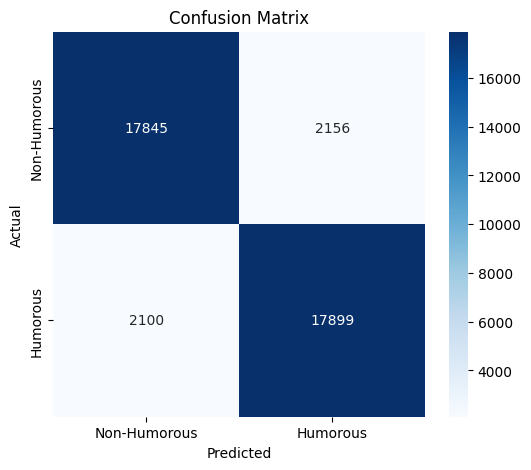

[CV] END C=0.001, dual=False, loss=squared_hinge, max_iter=3000; total time=   0.2s
[CV] END C=0.1, dual=False, loss=squared_hinge, max_iter=1000; total time=   0.5s
[CV] END .C=1, dual=False, loss=squared_hinge, max_iter=1000; total time=   1.0s
[CV] END C=0.01, dual=False, loss=squared_hinge, max_iter=1000; total time=   0.2s
[CV] END C=0.1, dual=False, loss=squared_hinge, max_iter=3000; total time=   0.5s
[CV] END .C=1, dual=False, loss=squared_hinge, max_iter=3000; total time=   1.0s
[CV] END C=0.001, dual=False, loss=squared_hinge, max_iter=1000; total time=   0.2s
[CV] END C=0.01, dual=False, loss=squared_hinge, max_iter=1000; total time=   0.2s
[CV] END C=0.1, dual=False, loss=squared_hinge, max_iter=3000; total time=   0.5s
[CV] END C=10, dual=False, loss=squared_hinge, max_iter=1000; total time=   1.9s
[CV] END C=0.001, dual=False, loss=squared_hinge, max_iter=3000; total time=   0.2s
[CV] END C=0.01, dual=False, loss=squared_hinge, max_iter=3000; total time=   0.2s
[CV] END C

In [47]:
evaluate_model(y_test, y_pred)

# LSTM

In [73]:
df

,text,humor,processed_text,word_count,label
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,joe biden rule bid guy im running,7,0
1,Watch: darvish gave hitter whiplash with slow ...,False,watch darvish gave hitter whiplash slow pitch,7,0
2,What do you call a turtle without its shell? d...,True,call turtle without shell dead,5,1
3,5 reasons the 2016 election feels so personal,False,reason election feel personal,4,0
4,"Pasco police shot mexican migrant from behind,...",False,pasco police shot mexican migrant behind new a...,9,0
...,...,...,...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False,conor maynard seamlessly fit oldschool rb hit ...,9,0
199996,How to you make holy water? you boil the hell ...,True,make holy water boil hell,5,1
199997,How many optometrists does it take to screw in...,True,many optometrist take screw lightbulb one two ...,9,1
199998,Mcdonald's will officially kick off all-day br...,False,mcdonalds officially kick allday breakfast oct...,6,0


In [74]:
X_train

153248    suicide bomber tripped outside news kiosk he f...
67802              call jamaican like spaghetti pastafarian
148889                lovin mcdonalds wage class war new ad
103093    waiter serving soup look like rain today patro...
104681    sander biggest spender far generating million ...
                                ...                        
119879       pinocchio say girlfriend sit face ill tell lie
103694       soccer player mistaken terrorist belgian hotel
131932    airbnb slapped suit alleged discrimination bla...
146867    report murdoch daughter split ultimate medium ...
121958        wanted drive shop buy guacamole didnt avocado
Name: processed_text, Length: 160000, dtype: object

In [75]:
y_train

153248    1
67802     1
148889    0
103093    1
104681    0
         ..
119879    1
103694    0
131932    0
146867    0
121958    1
Name: label, Length: 160000, dtype: int64

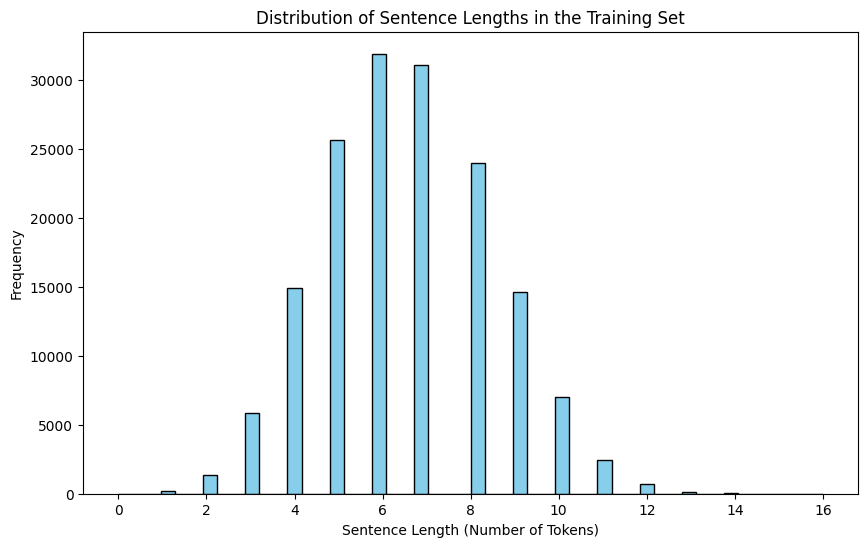

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
# Tokenize and pad
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Get the length of each sequence (sentence)
sentence_lengths = [len(seq) for seq in X_train_seq]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths in the Training Set')
plt.xlabel('Sentence Length (Number of Tokens)')
plt.ylabel('Frequency')
plt.show()



In [30]:
X_train_pad = pad_sequences(X_train_seq, maxlen=50, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=50, padding='post')


#Label Preparation
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes of preprocessed data
print(f"X_train_padded shape: {X_train_pad.shape}")
print(f"X_test_padded shape: {X_test_pad.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(X_train_pad)

X_train_padded shape: (160000, 50)
X_test_padded shape: (40000, 50)
y_train shape: (160000,)
y_test shape: (40000,)
[[ 592 2282 7119 ...    0    0    0]
 [   2 3597    1 ...    0    0    0]
 [1422 2130  606 ...    0    0    0]
 ...
 [7577 7937 1530 ...    0    0    0]
 [ 191 9442  296 ...    0    0    0]
 [ 284  455  738 ...    0    0    0]]


In [79]:
# Define the LSTM model
model_LSTM = Sequential()

# Add embedding layer
model_LSTM.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                         output_dim=100,  # Dimensionality of embedding space
                         input_length=50,  # Max length of padded sequences
                         trainable=True))  # Embeddings will be trainable

# Add Bidirectional LSTM layer
model_LSTM.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.2)))  # Using Bidirectional LSTM

# Add a Dense layer
model_LSTM.add(Dense(64, activation='relu'))

# Add a dropout layer for regularization
model_LSTM.add(Dropout(0.2))

# Add output layer with a sigmoid activation for binary classification
model_LSTM.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_LSTM.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
model_LSTM.summary()

# Train the model
history = model_LSTM.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 194s 77ms/step - accuracy: 0.6592 - loss: 0.6724 - val_accuracy: 0.7630 - val_loss: 0.5110
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 194s 78ms/step - accuracy: 0.7107 - loss: 0.5790 - val_accuracy: 0.7693 - val_loss: 0.5035
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 180s 72ms/step - accuracy: 0.7108 - loss: 0.5730 - val_accuracy: 0.7578 - val_loss: 0.5091
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 181s 72ms/step - accuracy: 0.7214 - loss: 0.5612 - val_accuracy: 0.7970 - val_loss: 0.4996
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 185s 74ms/step - accuracy: 0.7291 - loss: 0.5534 - val_accuracy: 0.7916 - val_loss: 0.4753


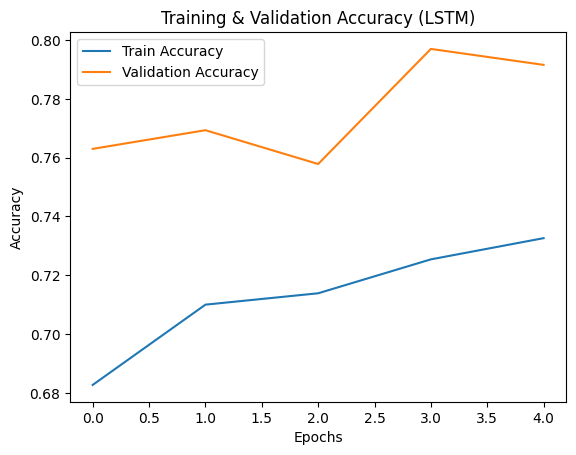

In [80]:
# Training Validation Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step
Accuracy: 0.791575

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.91      0.81     20001
           1       0.88      0.67      0.76     19999

    accuracy                           0.79     40000
   macro avg       0.81      0.79      0.79     40000
weighted avg       0.81      0.79      0.79     40000



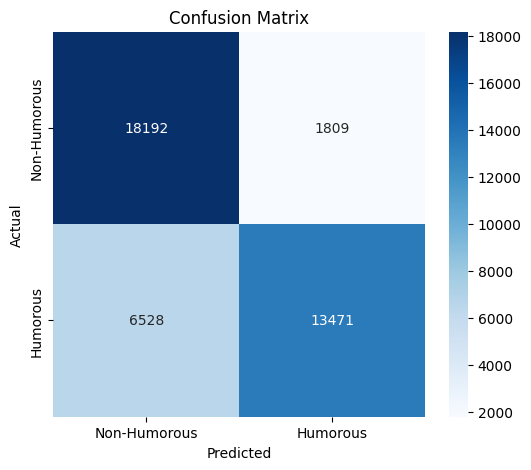

In [81]:
# Predict on the test set
y_pred_lstm = model_LSTM.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)  # Sigmoid outputs values between 0 and 1

# Evaluate the model
evaluate_model(y_test, y_pred_lstm_binary)

## Hyperparameter tuning

### reduce the learning rate to 0.01 for better learning

In [82]:
# Define the LSTM model
model_LSTM = Sequential()

# Add embedding layer
model_LSTM.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                         output_dim=100,  # Dimensionality of embedding space
                         input_length=50,  # Max length of padded sequences
                         trainable=True))  # Embeddings will be trainable

# Add Bidirectional LSTM layer
model_LSTM.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.2)))  # Using Bidirectional LSTM

# Add a Dense layer
model_LSTM.add(Dense(64, activation='relu'))

# Add a dropout layer for regularization
model_LSTM.add(Dropout(0.2))

# Add output layer with a sigmoid activation for binary classification
model_LSTM.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_LSTM.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
model_LSTM.summary()

# Train the model
history = model_LSTM.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 198s 79ms/step - accuracy: 0.8590 - loss: 0.3166 - val_accuracy: 0.9056 - val_loss: 0.2269
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 194s 77ms/step - accuracy: 0.9185 - loss: 0.2060 - val_accuracy: 0.9050 - val_loss: 0.2296
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 189s 76ms/step - accuracy: 0.9269 - loss: 0.1830 - val_accuracy: 0.9045 - val_loss: 0.2352
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 190s 76ms/step - accuracy: 0.9283 - loss: 0.1777 - val_accuracy: 0.9036 - val_loss: 0.2702
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 190s 76ms/step - accuracy: 0.9306 - loss: 0.1745 - val_accuracy: 0.9024 - val_loss: 0.2420


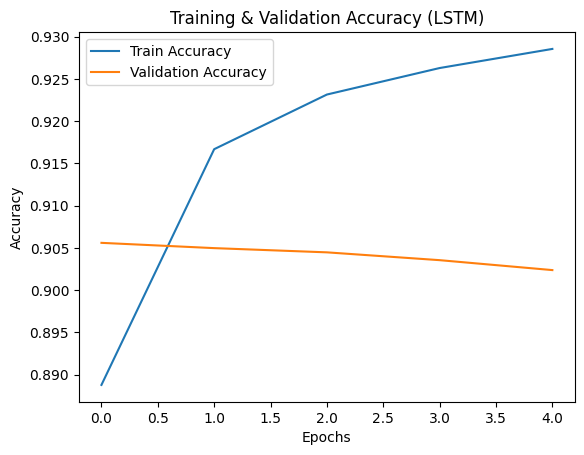

In [83]:
# Training Validation Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step
Accuracy: 0.902375

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     20001
           1       0.89      0.92      0.90     19999

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



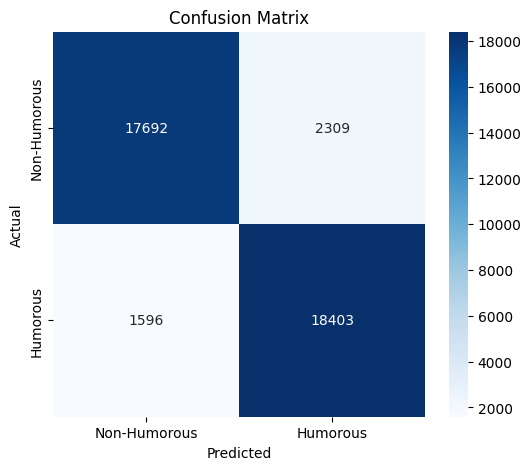

In [84]:
# Predict on the test set
y_pred_lstm = model_LSTM.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)  # Sigmoid outputs values between 0 and 1

# Evaluate the model
evaluate_model(y_test, y_pred_lstm_binary)

### increase the dropout rate to 0.3 and use early stopping method with learning rate 0.001

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the LSTM model
model_LSTM = Sequential()

# Add embedding layer
model_LSTM.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                         output_dim=100,  # Dimensionality of embedding space
                         input_length=50,  # Max length of padded sequences
                         trainable=True))  # Embeddings will be trainable

# Add Bidirectional LSTM layer
model_LSTM.add(Bidirectional(LSTM(256, return_sequences=False, dropout=0.3)))  # Using Bidirectional LSTM

# Add a Dense layer
model_LSTM.add(Dense(64, activation='relu'))

# Add a dropout layer for regularization
model_LSTM.add(Dropout(0.3))

# Add output layer with a sigmoid activation for binary classification
model_LSTM.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
model_LSTM.summary()
# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model with early stopping
history = model_LSTM.fit(X_train_pad, y_train, epochs=10, batch_size=64, 
                         validation_data=(X_test_pad, y_test), callbacks=[early_stopping])


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 438s 175ms/step - accuracy: 0.8536 - loss: 0.3192 - val_accuracy: 0.9065 - val_loss: 0.2210
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 769s 308ms/step - accuracy: 0.9214 - loss: 0.1957 - val_accuracy: 0.9109 - val_loss: 0.2141
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 344s 138ms/step - accuracy: 0.9343 - loss: 0.1642 - val_accuracy: 0.9103 - val_loss: 0.2216
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 347s 139ms/step - accuracy: 0.9439 - loss: 0.1412 - val_accuracy: 0.9094 - val_loss: 0.2311


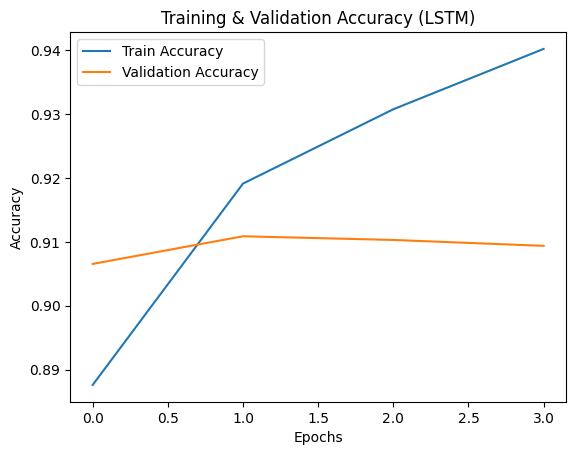

In [86]:
# Training Validation Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step
Accuracy: 0.910875

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     20001
           1       0.92      0.90      0.91     19999

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



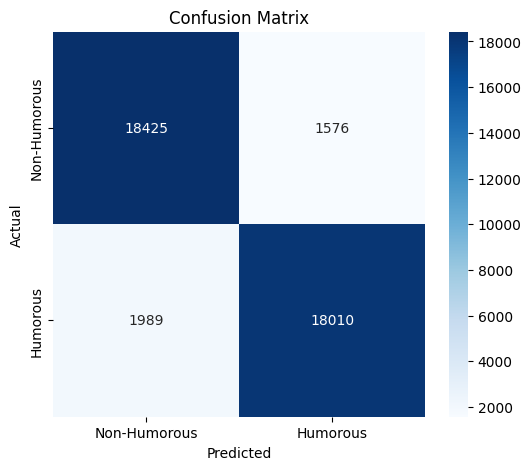

In [87]:
# Predict on the test set
y_pred_lstm = model_LSTM.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)  # Sigmoid outputs values between 0 and 1

# Evaluate the model
evaluate_model(y_test, y_pred_lstm_binary)

### decrease the learning rate to 0.0001 with dropout rate 0.3

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the LSTM model
model_LSTM = Sequential()

# Add embedding layer
model_LSTM.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                         output_dim=100,  # Dimensionality of embedding space
                         input_length=50,  # Max length of padded sequences
                         trainable=True))  # Embeddings will be trainable

# Add Bidirectional LSTM layer
model_LSTM.add(Bidirectional(LSTM(256, return_sequences=False, dropout=0.3)))  # Using Bidirectional LSTM

# Add a Dense layer
model_LSTM.add(Dense(64, activation='relu'))

# Add a dropout layer for regularization
model_LSTM.add(Dropout(0.3))

# Add output layer with a sigmoid activation for binary classification
model_LSTM.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_LSTM.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
model_LSTM.summary()
# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model with early stopping
history = model_LSTM.fit(X_train_pad, y_train, epochs=10, batch_size=64, 
                         validation_data=(X_test_pad, y_test), callbacks=[early_stopping])


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 328s 131ms/step - accuracy: 0.7789 - loss: 0.4393 - val_accuracy: 0.9021 - val_loss: 0.2373
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 335s 134ms/step - accuracy: 0.9063 - loss: 0.2329 - val_accuracy: 0.9070 - val_loss: 0.2242
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 345s 138ms/step - accuracy: 0.9164 - loss: 0.2068 - val_accuracy: 0.9083 - val_loss: 0.2203
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 365s 146ms/step - accuracy: 0.9198 - loss: 0.1987 - val_accuracy: 0.9089 - val_loss: 0.2213
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 341s 136ms/step - accuracy: 0.9255 - loss: 0.1857 - val_accuracy: 0.9087 - val_loss: 0.2185
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 332s 133ms/step - accuracy: 0.9299 - loss: 0.1788 - val_accuracy: 0.9093 - val_loss: 0.2196
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 361s 144ms/step - accuracy: 0.9310 - loss: 0.1746 - val_accuracy: 0.9080 - val_loss: 0.2227
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 374s 149ms/step - ac

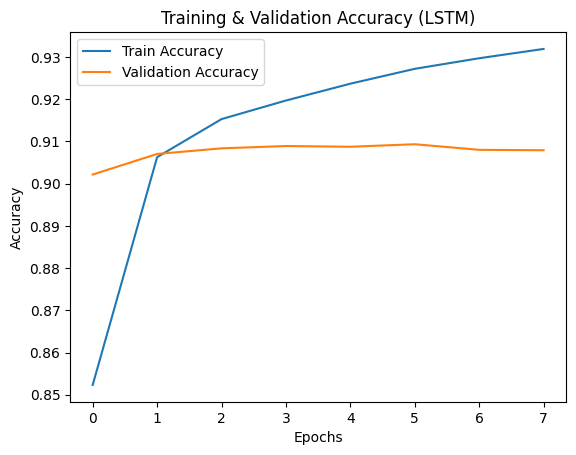

In [89]:
# Training Validation Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step
Accuracy: 0.909325

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     20001
           1       0.91      0.91      0.91     19999

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



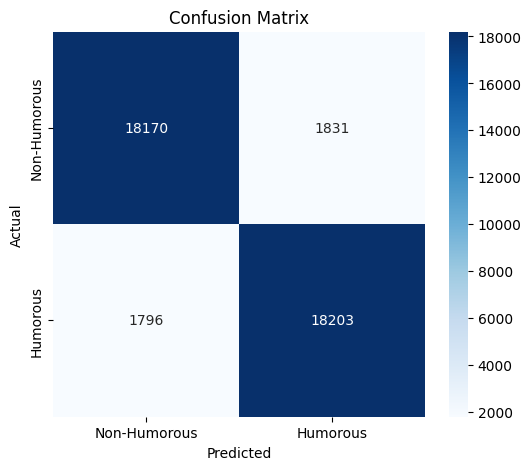

In [90]:
# Predict on the test set
y_pred_lstm = model_LSTM.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)  # Sigmoid outputs values between 0 and 1

# Evaluate the model
evaluate_model(y_test, y_pred_lstm_binary)

### learning rate 0.001 and dropout 0.4

In [91]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the LSTM model
model_LSTM = Sequential()

# Add embedding layer
model_LSTM.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                         output_dim=100,  # Dimensionality of embedding space
                         input_length=50,  # Max length of padded sequences
                         trainable=True))  # Embeddings will be trainable

# Add Bidirectional LSTM layer
model_LSTM.add(Bidirectional(LSTM(256, return_sequences=False, dropout=0.4)))  # Using Bidirectional LSTM

# Add a Dense layer
model_LSTM.add(Dense(64, activation='relu'))

# Add a dropout layer for regularization
model_LSTM.add(Dropout(0.4))

# Add output layer with a sigmoid activation for binary classification
model_LSTM.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
model_LSTM.summary()
# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model with early stopping
history = model_LSTM.fit(X_train_pad, y_train, epochs=5, batch_size=64, 
                         validation_data=(X_test_pad, y_test), callbacks=[early_stopping])


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 355s 142ms/step - accuracy: 0.8528 - loss: 0.3227 - val_accuracy: 0.9061 - val_loss: 0.2256
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 343s 137ms/step - accuracy: 0.9200 - loss: 0.1980 - val_accuracy: 0.9095 - val_loss: 0.2170
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 331s 132ms/step - accuracy: 0.9319 - loss: 0.1731 - val_accuracy: 0.9115 - val_loss: 0.2210
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 326s 130ms/step - accuracy: 0.9398 - loss: 0.1531 - val_accuracy: 0.9093 - val_loss: 0.2190
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 332s 133ms/step - accuracy: 0.9464 - loss: 0.1360 - val_accuracy: 0.9080 - val_loss: 0.2341


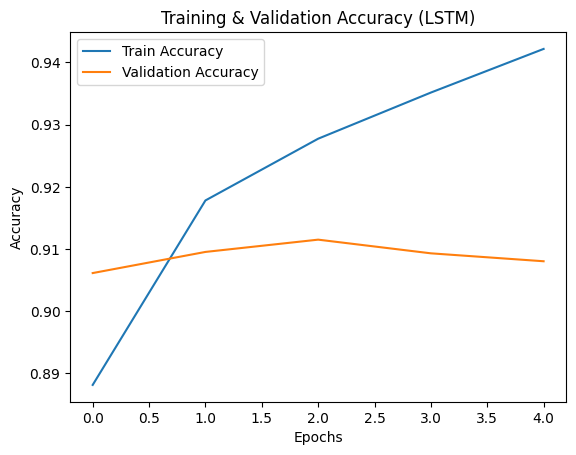

In [92]:
# Training Validation Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step
Accuracy: 0.9115

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     20001
           1       0.91      0.91      0.91     19999

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



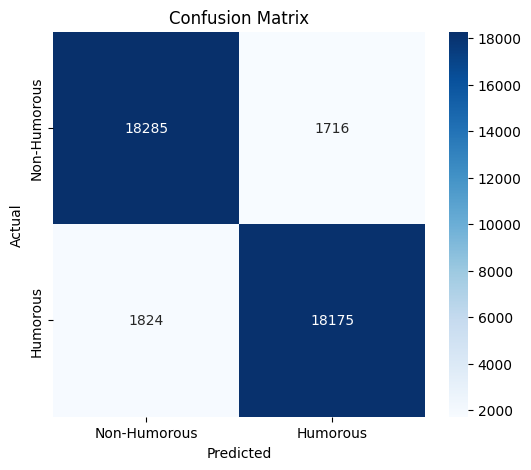

In [93]:
# Predict on the test set
y_pred_lstm = model_LSTM.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)  # Sigmoid outputs values between 0 and 1

# Evaluate the model
evaluate_model(y_test, y_pred_lstm_binary)

### Test the Model

In [94]:
def preprocess_and_predict(text, model, tokenizer, max_length=50):
    # Step 1: Preprocess the input text
    text_processed = preprocess_text(text)  # You can reuse your preprocessing function
    
    # Step 2: Tokenize the text
    text_seq = tokenizer.texts_to_sequences([text_processed])  # Tokenize the processed text
    
    # Step 3: Pad the sequence to match the input length
    text_pad = pad_sequences(text_seq, maxlen=max_length, padding='post')
    
    # Step 4: Use the trained model to predict the label
    prediction = model.predict(text_pad)
    
    print(f"Predicted probabilities: {prediction}")  # Print the raw output (probability)
    
    # Step 5: Interpret the result (since it's binary classification)
    if prediction > 0.8:
        label = 1  # Humor (humorous text)
    else:
        label = 0  # Non-humor (non-humorous text)
    
    return label, prediction

# Example usage:
texts = ["lets get food","my name is Dure","Why don't skeletons fight each other? They don't have the guts!","Investors are worried about the economic slowdown","No chance of rain expected."]
for text in texts:
    label, prediction = preprocess_and_predict(text, model_LSTM, tokenizer)
    print(f"Predicted label for {text}: {label}")  # 0 for Non-humorous, 1 for Humorous
    print(f"Prediction Probability: {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted probabilities: [[0.39538142]]
Predicted label for lets get food: 0
Prediction Probability: 0.3954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted probabilities: [[0.9082775]]
Predicted label for my name is Dure: 1
Prediction Probability: 0.9083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted probabilities: [[0.9451352]]
Predicted label for Why don't skeletons fight each other? They don't have the guts!: 1
Prediction Probability: 0.9451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted probabilities: [[0.00126338]]
Predicted label for Investors are worried about the economic slowdown: 0
Prediction Probability: 0.0013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted probabilities: [[0.10159066]]
Predicted label for No chance of rain expected.: 0
Prediction Probability: 0.1016


# 2. GRU

In [31]:
X_train_pad = pad_sequences(X_train_seq, maxlen=50, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=50, padding='post')


#Label Preparation
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes of preprocessed data
print(f"X_train_padded shape: {X_train_pad.shape}")
print(f"X_test_padded shape: {X_test_pad.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(X_train_pad)

X_train_padded shape: (160000, 50)
X_test_padded shape: (40000, 50)
y_train shape: (160000,)
y_test shape: (40000,)
[[ 592 2282 7119 ...    0    0    0]
 [   2 3597    1 ...    0    0    0]
 [1422 2130  606 ...    0    0    0]
 ...
 [7577 7937 1530 ...    0    0    0]
 [ 191 9442  296 ...    0    0    0]
 [ 284  455  738 ...    0    0    0]]


In [32]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [33]:
#GRU Model
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=10000, output_dim=128, input_length=50))
model_GRU.add(Bidirectional(GRU(64, return_sequences=False, dropout=0.2)))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation='sigmoid'))

#Compiling
optimizer = Adam(learning_rate=0.1)
model_GRU.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

#Training
history_GRU = model_GRU.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stop])

Epoch 1/10


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 117s 23ms/step - accuracy: 0.6850 - loss: 0.8190 - val_accuracy: 0.7930 - val_loss: 0.5359
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 118s 24ms/step - accuracy: 0.7194 - loss: 0.6252 - val_accuracy: 0.7406 - val_loss: 0.6325
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 118s 24ms/step - accuracy: 0.7285 - loss: 0.6110 - val_accuracy: 0.8114 - val_loss: 0.5340
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 119s 24ms/step - accuracy: 0.7382 - loss: 0.6007 - val_accuracy: 0.8045 - val_loss: 0.5166
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 119s 24ms/step - accuracy: 0.7394 - loss: 0.5999 - val_accuracy: 0.8267 - val_loss: 0.4839
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 117s 23ms/step - accuracy: 0.7458 - loss: 0.5913 - val_accuracy: 0.8242 - val_loss: 0.5209
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 119s 24ms/step - accuracy: 0.7524 - loss: 0.5856 - val_accuracy: 0.8190 - val_loss: 0.5198


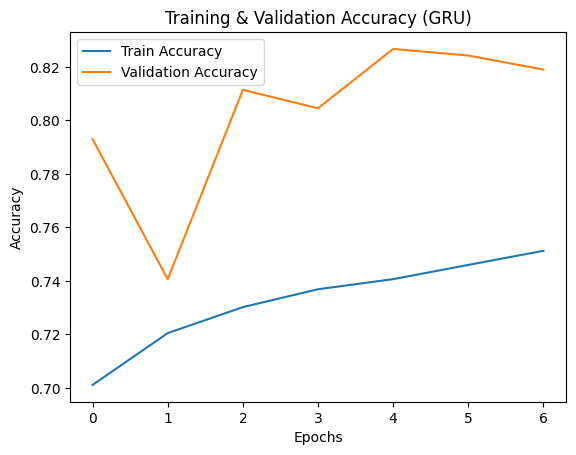

In [34]:
# Plot training & validation accuracy
plt.plot(history_GRU.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
Accuracy: 0.8267

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     20001
           1       0.83      0.82      0.82     19999

    accuracy                           0.83     40000
   macro avg       0.83      0.83      0.83     40000
weighted avg       0.83      0.83      0.83     40000



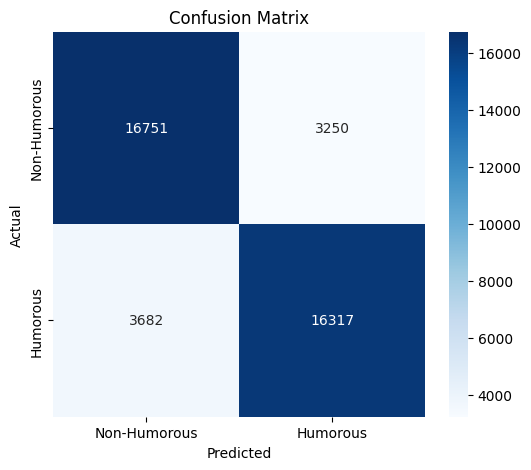

In [35]:
# Predict on the test set
y_pred_gru = model_GRU.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

# Evaluate the GRU model
evaluate_model(y_test, y_pred_gru_binary)

### hyperparameter tuning

use 128 units in GRU layer with 0.01 learning rate and 0.3 dropout rate

In [36]:
#GRU Model
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=10000, output_dim=128, input_length=50))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False, dropout=0.3)))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model_GRU.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU = model_GRU.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stop])

Epoch 1/10


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 231s 46ms/step - accuracy: 0.8542 - loss: 0.4061 - val_accuracy: 0.8693 - val_loss: 0.3768
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 229s 46ms/step - accuracy: 0.8700 - loss: 0.3879 - val_accuracy: 0.8672 - val_loss: 0.3709
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 240s 48ms/step - accuracy: 0.8623 - loss: 0.4012 - val_accuracy: 0.8543 - val_loss: 0.3893
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 242s 48ms/step - accuracy: 0.8550 - loss: 0.4011 - val_accuracy: 0.8646 - val_loss: 0.3851


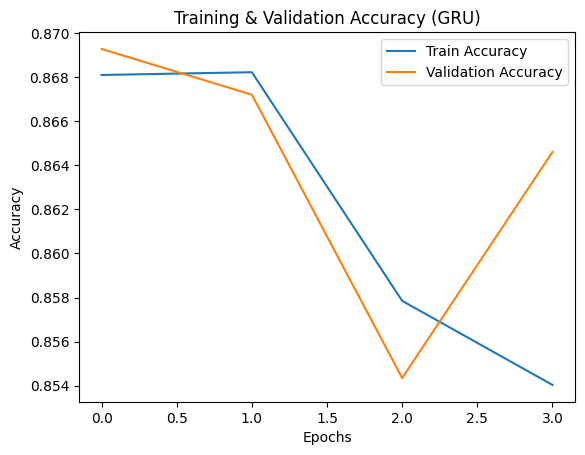

In [37]:
# Plot training & validation accuracy
plt.plot(history_GRU.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step
Accuracy: 0.8672

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     20001
           1       0.87      0.87      0.87     19999

    accuracy                           0.87     40000
   macro avg       0.87      0.87      0.87     40000
weighted avg       0.87      0.87      0.87     40000



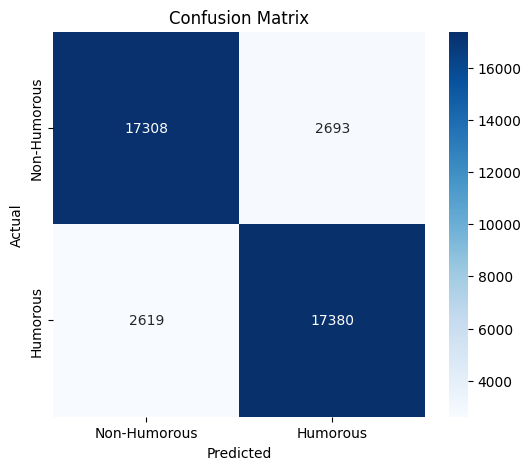

In [38]:
# Predict on the test set
y_pred_gru = model_GRU.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

# Evaluate the GRU model
evaluate_model(y_test, y_pred_gru_binary)

add a dense layer with 128 units and increase dropout from 0.3 to 0.4

In [39]:
#GRU Model
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=10000, output_dim=128, input_length=50))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False, dropout=0.3)))
model_GRU.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.4))
model_GRU.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model_GRU.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU = model_GRU.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stop])

Epoch 1/10


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 261s 52ms/step - accuracy: 0.8577 - loss: 0.3964 - val_accuracy: 0.9079 - val_loss: 0.2431
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 241s 48ms/step - accuracy: 0.9232 - loss: 0.2048 - val_accuracy: 0.9082 - val_loss: 0.2226
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 280s 56ms/step - accuracy: 0.9358 - loss: 0.1715 - val_accuracy: 0.9113 - val_loss: 0.2240
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 232s 46ms/step - accuracy: 0.9454 - loss: 0.1481 - val_accuracy: 0.9102 - val_loss: 0.2364


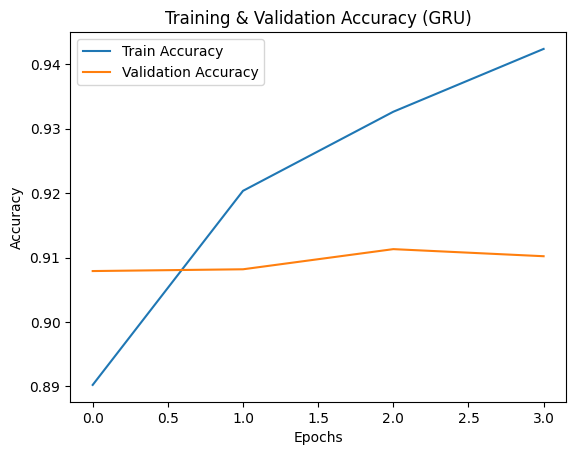

In [40]:
# Plot training & validation accuracy
plt.plot(history_GRU.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step
Accuracy: 0.908175

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     20001
           1       0.93      0.88      0.91     19999

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



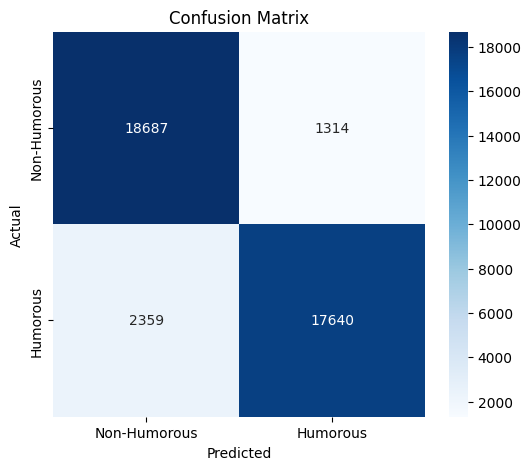

In [41]:
# Predict on the test set
y_pred_gru = model_GRU.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

# Evaluate the GRU model
evaluate_model(y_test, y_pred_gru_binary)

set learning rate to 0.0005

In [42]:
#GRU Model
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=10000, output_dim=128, input_length=50))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False, dropout=0.3)))
model_GRU.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.4))
model_GRU.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0005)
model_GRU.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU = model_GRU.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stop])

Epoch 1/10


/Users/dureaqdaskhan/Desktop/langchain/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 244s 48ms/step - accuracy: 0.8501 - loss: 0.4689 - val_accuracy: 0.9081 - val_loss: 0.2296
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 232s 46ms/step - accuracy: 0.9200 - loss: 0.2071 - val_accuracy: 0.9113 - val_loss: 0.2197
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 237s 47ms/step - accuracy: 0.9313 - loss: 0.1803 - val_accuracy: 0.9106 - val_loss: 0.2208
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 234s 47ms/step - accuracy: 0.9406 - loss: 0.1561 - val_accuracy: 0.9089 - val_loss: 0.2425


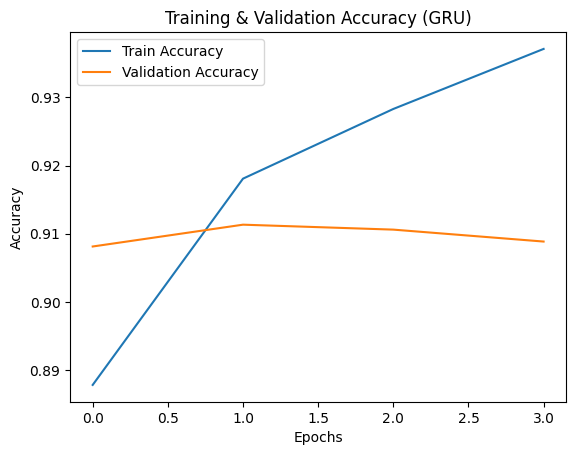

In [43]:
# Plot training & validation accuracy
plt.plot(history_GRU.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step
Accuracy: 0.911325

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     20001
           1       0.91      0.91      0.91     19999

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



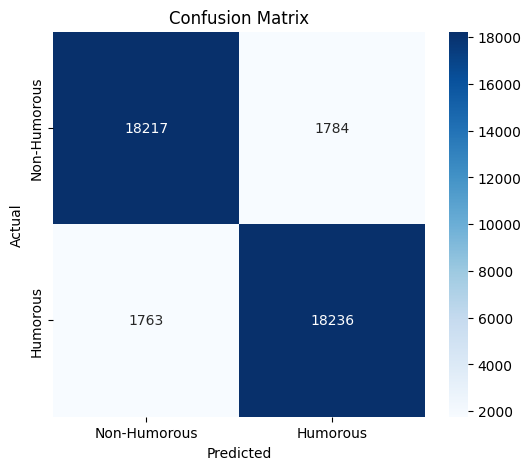

In [44]:
# Predict on the test set
y_pred_gru = model_GRU.predict(X_test_pad)

# Convert predictions to binary (0 or 1)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

# Evaluate the GRU model
evaluate_model(y_test, y_pred_gru_binary)